In [20]:
import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
sys.path.append("..")
import pandas as pd
import numpy as np
import warnings
import mlflow
from modeling.config import TRACKING_URI, EXPERIMENT_NAME
from pandas_profiling import ProfileReport
import pyarrow.feather as feather
import time
from datetime import datetime


In [21]:
export_df = feather.read_feather("../data/data_EDA.feather")

In [22]:
gpbyuser= export_df.groupby( by= ['user_id'])
gpbyuser2=gpbyuser.sum()
gpbyuser2['count1'] = gpbyuser.size()
gpbyuser2['opened_rate'] = gpbyuser2['opened']/gpbyuser2['count1']
gpbyuser2['ontime_activity_rate'] = gpbyuser2["notif_viewed_ontime"]/gpbyuser2['count1']
gpbyuser2

,area_of_effect_coordinates_latitude,area_of_effect_coordinates_longitude,lenght,emoji_size,slang_char,slang_verb,slang_pron,slang_adp,slang_noun,slang_num,...,Tren Suburbano,Tren Ligero,"Camión, Microbús, Combi",notif_viewed_ontime,reaction_time,opened,opened_rate,interesting_message,count1,ontime_activity_rate
user_id,,,,,,,,,,,,,,,,,,,,,
00087,-1684.767232,330.804900,2137,14.0,162.0,3.0,5.0,2.0,2.0,0.0,...,0.0,0.0,17.0,14,278.766667,0,0.000000,9,17,0.823529
00117,0.000000,0.000000,501,4.0,59.0,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3,77.766667,0,0.000000,2,4,0.750000
001e1,-1686.475347,328.643503,2113,19.0,244.0,7.0,7.0,2.0,3.0,0.0,...,0.0,0.0,17.0,16,345.316667,0,0.000000,1,17,0.941176
00205,-1784.841298,349.420908,2171,18.0,166.0,2.0,9.0,0.0,3.0,0.0,...,0.0,0.0,18.0,1,9337.500000,6,0.333333,2,18,0.055556
0026c,-1586.079503,311.013728,2625,24.0,283.0,8.0,4.0,3.0,4.0,0.0,...,0.0,0.0,16.0,2,7689.466667,2,0.083333,3,24,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff2a,-17638.600783,3458.458357,35157,309.0,4056.0,65.0,135.0,38.0,105.0,2.0,...,0.0,0.0,176.0,248,7980.416667,0,0.000000,45,302,0.821192
fff48,-3766.492158,736.428435,5765,38.0,583.0,11.0,18.0,8.0,13.0,0.0,...,0.0,0.0,38.0,23,2534.350000,1,0.024390,6,41,0.560976
fff4d,0.000000,0.000000,892,8.0,92.0,1.0,3.0,1.0,2.0,0.0,...,0.0,0.0,0.0,4,787.550000,2,0.250000,6,8,0.500000


In [23]:
gpbyuser2.drop(gpbyuser2[gpbyuser2['count1'] <3 ].index, inplace=True  )
real_users=gpbyuser2.index.tolist()
real_users
gpbyuser2

,area_of_effect_coordinates_latitude,area_of_effect_coordinates_longitude,lenght,emoji_size,slang_char,slang_verb,slang_pron,slang_adp,slang_noun,slang_num,...,Tren Suburbano,Tren Ligero,"Camión, Microbús, Combi",notif_viewed_ontime,reaction_time,opened,opened_rate,interesting_message,count1,ontime_activity_rate
user_id,,,,,,,,,,,,,,,,,,,,,
00087,-1684.767232,330.804900,2137,14.0,162.0,3.0,5.0,2.0,2.0,0.0,...,0.0,0.0,17.0,14,278.766667,0,0.000000,9,17,0.823529
00117,0.000000,0.000000,501,4.0,59.0,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3,77.766667,0,0.000000,2,4,0.750000
001e1,-1686.475347,328.643503,2113,19.0,244.0,7.0,7.0,2.0,3.0,0.0,...,0.0,0.0,17.0,16,345.316667,0,0.000000,1,17,0.941176
00205,-1784.841298,349.420908,2171,18.0,166.0,2.0,9.0,0.0,3.0,0.0,...,0.0,0.0,18.0,1,9337.500000,6,0.333333,2,18,0.055556
0026c,-1586.079503,311.013728,2625,24.0,283.0,8.0,4.0,3.0,4.0,0.0,...,0.0,0.0,16.0,2,7689.466667,2,0.083333,3,24,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff2a,-17638.600783,3458.458357,35157,309.0,4056.0,65.0,135.0,38.0,105.0,2.0,...,0.0,0.0,176.0,248,7980.416667,0,0.000000,45,302,0.821192
fff48,-3766.492158,736.428435,5765,38.0,583.0,11.0,18.0,8.0,13.0,0.0,...,0.0,0.0,38.0,23,2534.350000,1,0.024390,6,41,0.560976
fff4d,0.000000,0.000000,892,8.0,92.0,1.0,3.0,1.0,2.0,0.0,...,0.0,0.0,0.0,4,787.550000,2,0.250000,6,8,0.500000


In [24]:
real_users=gpbyuser2.index.tolist()
len(real_users)

10642

In [25]:
gpbyincident= export_df.groupby( by= ['document_id', 'description','cause', 'effect'])
gpbyincident2=gpbyincident.sum()
gpbyincident2['count1'] = gpbyincident.size()
gpbyincident2['opened_rate'] = gpbyincident2['opened']/gpbyincident2['count1']
gpbyincident2['ontime_activity_rate'] = gpbyincident2["notif_viewed_ontime"]/gpbyincident2['count1']




In [26]:
gpbycause= export_df.groupby( by= ['cause'])
gpbycause2=gpbycause.sum()
gpbycause2['count1'] = gpbycause.size()
gpbycause2['opened_rate'] = gpbycause2['opened']/gpbycause2['count1']
gpbycause2['ontime_activity_rate'] = gpbycause2["notif_viewed_ontime"]/gpbycause2['count1']



In [34]:
gpbyeffect= export_df.groupby( by= ['effect'])
gpbyeffect2=gpbyeffect.sum()
gpbyeffect2['count1'] = gpbyeffect.size()
gpbyeffect2['opened_rate'] = gpbyeffect2['opened']/gpbyeffect2['count1']
gpbyeffect2['ontime_activity_rate'] = gpbyeffect2["notif_viewed_ontime"]/gpbyeffect2['count1']

In [35]:
gpbyeffect2

,area_of_effect_coordinates_latitude,area_of_effect_coordinates_longitude,lenght,emoji_size,slang_char,slang_verb,slang_pron,slang_adp,slang_noun,slang_num,...,Tren Suburbano,Tren Ligero,"Camión, Microbús, Combi",notif_viewed_ontime,reaction_time,opened,opened_rate,interesting_message,count1,ontime_activity_rate
effect,,,,,,,,,,,,,,,,,,,,,
,-5.618372e+04,1.099507e+04,157556,1379.0,21309.0,193.0,877.0,140.0,644.0,0.0,...,0.0,0.0,567.0,1029,1.750979e+05,53,0.038602,208,1373,0.749454
CirculationRestored,-2.013270e+06,3.942479e+05,3243188,25664.0,214043.0,2898.0,13819.0,2554.0,3153.0,0.0,...,222.0,109.0,17198.0,12347,3.035885e+06,880,0.033877,3740,25976,0.475323
CirculationShutdown,-1.124517e+07,2.201933e+06,15048479,116385.0,1610509.0,38389.0,46490.0,22657.0,36022.0,80.0,...,55.0,290.0,106672.0,82421,1.329449e+07,4023,0.034130,25642,117873,0.699236
Delays,-3.257026e+07,6.377952e+06,51994320,459915.0,5841652.0,94775.0,219354.0,71857.0,129212.0,1319.0,...,0.0,398.0,312303.0,253801,5.252894e+07,14077,0.031004,71138,454042,0.558981
Evacuation,-9.816172e+03,1.925191e+03,28719,252.0,2115.0,0.0,99.0,0.0,0.0,0.0,...,0.0,0.0,99.0,144,3.302310e+04,7,0.027778,0,252,0.571429
FullCapacity,-6.149259e+03,1.200648e+03,101049,853.0,19761.0,836.0,41.0,345.0,656.0,0.0,...,0.0,0.0,0.0,461,6.618342e+04,68,0.079719,812,853,0.540445
HighWaitingTime,-3.936658e+04,7.696293e+03,3382082,29855.0,413436.0,6801.0,10570.0,8225.0,11326.0,370.0,...,0.0,0.0,238.0,18090,3.178392e+06,1491,0.051162,15419,29143,0.620732
InterimService,-1.520715e+05,2.981364e+04,2750996,16067.0,214263.0,8375.0,5095.0,2517.0,4381.0,0.0,...,0.0,46.0,284.0,11135,1.784807e+06,944,0.062774,10166,15038,0.740458
LaneReduction,-3.888689e+06,7.613555e+05,5088894,40533.0,395120.0,3690.0,18569.0,1033.0,3148.0,0.0,...,75.0,134.0,38572.0,17630,5.233719e+06,1064,0.026905,4864,39547,0.445799


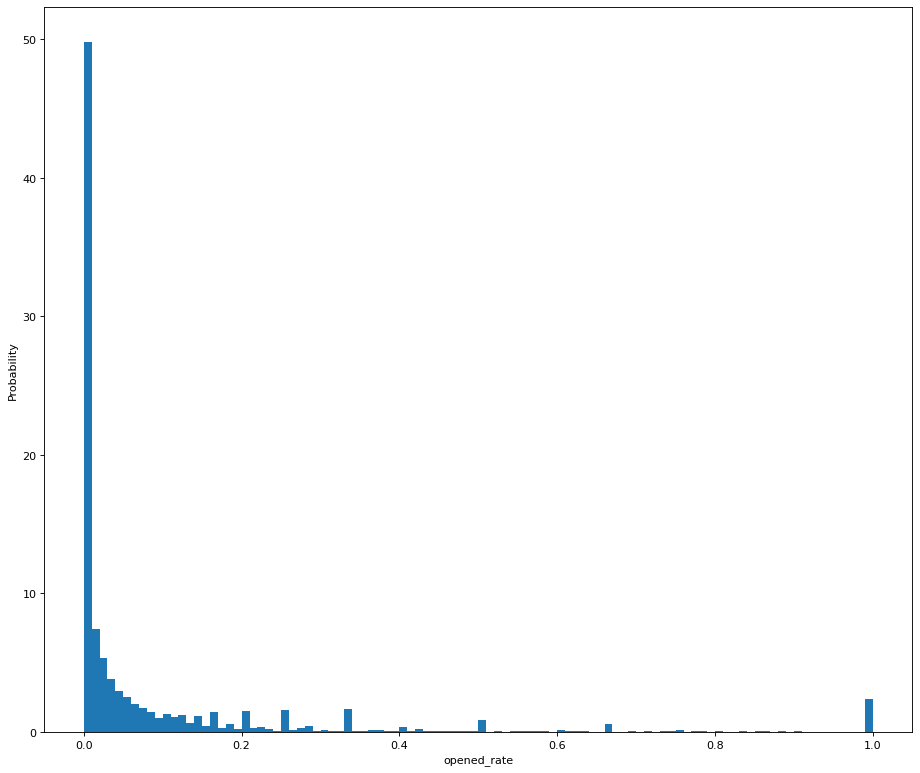

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

x=gpbyuser2.opened_rate

figure(figsize=(14, 12), dpi=80)
plt.hist(x, density=True, bins=100)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('opened_rate');

In [28]:
gpbyuser_dismissers= gpbyuser2.loc[gpbyuser2['opened_rate']== 0 ]
gpbyuser_dismissers

,area_of_effect_coordinates_latitude,area_of_effect_coordinates_longitude,lenght,emoji_size,slang_char,slang_verb,slang_pron,slang_adp,slang_noun,slang_num,...,Tren Suburbano,Tren Ligero,"Camión, Microbús, Combi",notif_viewed_ontime,reaction_time,opened,opened_rate,interesting_message,count1,ontime_activity_rate
user_id,,,,,,,,,,,,,,,,,,,,,
00087,-1684.767232,330.804900,2137,14.0,162.0,3.0,5.0,2.0,2.0,0.0,...,0.0,0.0,17.0,14,278.766667,0,0.0,9,17,0.823529
00117,0.000000,0.000000,501,4.0,59.0,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3,77.766667,0,0.0,2,4,0.750000
001e1,-1686.475347,328.643503,2113,19.0,244.0,7.0,7.0,2.0,3.0,0.0,...,0.0,0.0,17.0,16,345.316667,0,0.0,1,17,0.941176
002f1,-297.426877,58.184144,471,5.0,33.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,2550.566667,0,0.0,3,5,0.000000
002fa,-297.701659,58.497048,340,3.0,24.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0,139.716667,0,0.0,0,3,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffd86,-693.858813,137.385153,2986,22.0,303.0,7.0,9.0,5.0,11.0,0.0,...,0.0,0.0,7.0,12,3652.716667,0,0.0,8,22,0.545455
ffedf,0.000000,0.000000,682,3.0,24.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4,411.050000,0,0.0,3,4,1.000000
fff2a,-17638.600783,3458.458357,35157,309.0,4056.0,65.0,135.0,38.0,105.0,2.0,...,0.0,0.0,176.0,248,7980.416667,0,0.0,45,302,0.821192


In [29]:
gpbyuser_openers= gpbyuser2.loc[gpbyuser2['opened_rate']== 1]
gpbyuser_openers

,area_of_effect_coordinates_latitude,area_of_effect_coordinates_longitude,lenght,emoji_size,slang_char,slang_verb,slang_pron,slang_adp,slang_noun,slang_num,...,Tren Suburbano,Tren Ligero,"Camión, Microbús, Combi",notif_viewed_ontime,reaction_time,opened,opened_rate,interesting_message,count1,ontime_activity_rate
user_id,,,,,,,,,,,,,,,,,,,,,
0072a,-198.225494,38.964150,476,4.0,42.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,3,193.966667,4,1.0,0,4,0.750000
00de8,-99.128561,19.481313,312,4.0,56.0,1.0,0.0,1.0,3.0,0.0,...,0.0,0.0,1.0,3,48.850000,3,1.0,0,3,1.000000
00f03,-297.434092,58.370746,1360,11.0,141.0,4.0,5.0,1.0,3.0,0.0,...,0.0,0.0,3.0,11,78.050000,11,1.0,8,11,1.000000
02423,0.000000,0.000000,301,3.0,25.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,326.233333,3,1.0,2,3,0.666667
02aa0,-99.209317,19.460743,346,3.0,58.0,0.0,1.0,1.0,4.0,0.0,...,0.0,0.0,1.0,3,136.966667,3,1.0,0,3,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd695,-495.775587,97.116459,803,7.0,68.0,1.0,4.0,0.0,1.0,0.0,...,0.0,0.0,5.0,7,150.916667,7,1.0,3,7,1.000000
ff2ac,-99.079372,19.451504,327,3.0,28.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3,43.033333,3,1.0,0,3,1.000000
ff623,-297.435218,57.949825,581,5.0,96.0,2.0,2.0,1.0,3.0,0.0,...,0.0,1.0,3.0,2,237.716667,5,1.0,2,5,0.400000


In [30]:
gpbyuser_openers['count1'].sort_values().value_counts()

3     73
4     49
5     29
6     20
8     17
7     15
10     8
11     8
9      6
13     4
16     3
19     3
12     2
14     2
17     2
18     2
24     1
26     1
27     1
44     1
62     1
Name: count1, dtype: int64

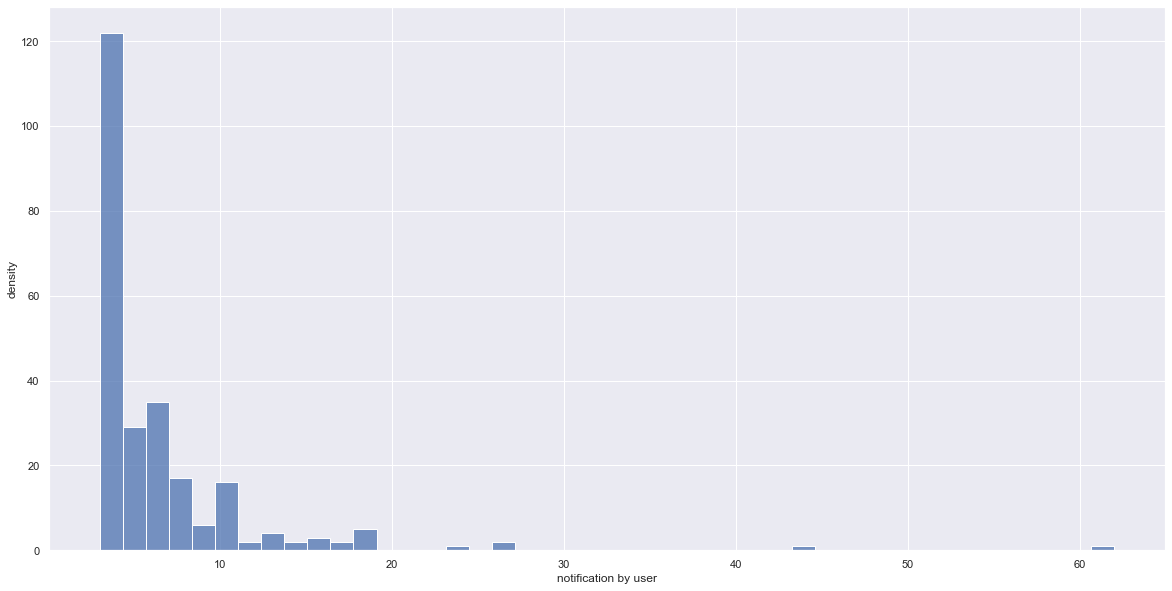

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

x=gpbyuser_openers['count1']

sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x)
plt.ylabel('density')
plt.xlabel('notification by user');

In [32]:
!pip3 install pandas-profiling
from pandas_profiling import ProfileReport
profexport = ProfileReport(active_df)
profexport.to_file(output_file='profexport.html')


NameError: name 'active_df' is not defined

In [ ]:
profincident = ProfileReport(gpbyincident2)
profincident.to_file(output_file='profincident.html')


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 18.93it/s]


In [ ]:
profcause = ProfileReport(gpbycause2)
profcause.to_file(output_file='profcause.html')


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 19.83it/s]


In [ ]:
profallusers= ProfileReport(gpbyuser2)
profallusers.to_file(output_file='profallusers.html')


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 14.47it/s]


In [ ]:
profusersdismiss= ProfileReport(gpbyuser_dismissers)
profusersdismiss.to_file(output_file='profusersdismiss.html')


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 14.94it/s]


In [ ]:
profusersopen= ProfileReport(gpbyuser_openers)
profusersopen.to_file(output_file='profusersopen.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]
